# Introduction to Topic Modeling
## Day 2: Visualization and Evaluation
---
---

## Outline
- [Load the data](#data)
- [Vectorize and train](#train)
- [Visualize topic words with `wordcloud`](#cloud)
- [Words aligned with each topic](#words)
- [Topic prevalence](#prevalence)
- [Topics over time](#time)
- [Visualising topics with pyLDAvis](#viz)
- [Evaluating the topic model](#eval)
- [Resources and alternatives](#resources)

## Load data

In [19]:
import pandas as pd
import numpy as np

df_lit = pd.read_csv("../assets/childrens_lit.csv.bz2", sep='\t', index_col=0, encoding = 'utf-8', compression='bz2')
df_lit = df_lit.dropna(subset=['text']) # drop where missing text

## Vectorize and train <a id='train'></a>

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None,
                                stop_words='english')

# Create sparse DTM
tf_dtm = tf_vectorizer.fit_transform(df_lit.text)

vocab = tf_vectorizer.get_feature_names_out() # Save vocabulary for later use

In [21]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_samples = 2000
n_topics = 4
n_top_words = 50

print("Fitting LDA model with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

lda = LDA(n_components=n_topics, 
          max_iter=20,
          learning_method='online',
          learning_offset=80.,
          total_samples=n_samples,
          random_state=0)

#fit the model
lda.fit(tf_dtm)
print("Done!")

Fitting LDA model with tf features, n_samples=2000 and n_topics=4...
Done!


In [22]:
def print_top_words(model, feature_names, n_top_words):
    '''Prints the top words for each topic in a pretty way.'''
    
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
# print top words
print("\nTopics in LDA model with TF features and %d topics:" % n_topics)
print_top_words(lda, vocab, n_top_words)


Topics in LDA model with TF features and 4 topics:

Topic #0:
project doctor girls sister papa mamma london baby sweet tom street works dr remarked aunt tea youth foundation presently study em ain cousin office darling loved ladies wasn everybody public flower observed nurse ma shop snow ye queen class reader ice stairs flowers lovely agreement sisters doesn carriage bell garden

Topic #1:
dick uncle doctor er jack ain tom den yer fish em rock wolf gun rope lads ha birds rocks beneath ay stream shock tail moments mate excitedly garden eh sand fishing thrust ye nay gazing softly mountain ship tremendous hook bird leg ashore growled penny shore stones farther jump knife

Topic #2:
king army french troops camp attack officers prince ship john soldiers city village officer guns rode shore regiment march tom fort wounded british boats sword advanced castle jack james indian band marched native prisoners ships arrows france numbers lads forest frank ride presently vessel fought mounted flee

### Challenge 1

Use `sklearn`'s `TfidfVectorizer()` function ([more info here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)) to weight features with TF-IDF.

In [23]:
# solution

from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize our text using TfidfVectorizer
print("Extracting tf-idf features for LDA...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=50,
                                   max_features=None,
                                   stop_words='english')

# Create sparse DTM with TF-IDF weighting
dtm = tfidf_vectorizer.fit_transform(df_lit.text)
print("Done!")

Extracting tf-idf features for LDA...
Done!


### Challenge 2

Train an LDA model using the TF-IDF-weighted. Then use the `print_top_words()` function defined above to display the top words for each topic. Compare with the output we just saw from the model trained using term frequencies.

In [24]:
# solution
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_samples = 2000
n_topics = 4
n_top_words = 50

print("Fitting LDA model with tf-idf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

lda = LDA(n_components=n_topics, 
          max_iter=20,
          learning_method='online',
          learning_offset=80.,
          total_samples=n_samples,
          random_state=0)

# fit the model
lda.fit(dtm)
print("Done!")

# print top words per topic
print("\nTopics in LDA model with TF-IDF features and %d topics:" % n_topics)
print_top_words(lda, vocab, n_top_words)

Fitting LDA model with tf-idf features, n_samples=2000 and n_topics=4...
Done!

Topics in LDA model with TF-IDF features and 4 topics:

Topic #0:
project papa dick mass mail ma doctor moonlight folks foundation mamma tiny seating shouldn island lake minded select loved shone wont minister beauty discussed believing plunged songs south dreary cliffs desired subdued rejoiced wounds reported riding entertainment delicate tea calculate dr sufficed pipe wicked remarked charged undertaking arrival brush animal

Topic #1:
dick fish sunk distinguished guns drifted suited consisting charming tail subsided peril attempted powder invalid blame plate prize unusual granted respected stunned solid reported amazement facing reputation stock clapping scratched string larger profit meat supposing pour tower bleeding climbing tie awe bade stolen absurd disaster rattle keen honestly plunged tumbled

Topic #2:
project doctor king dick tom uncle camp ship jack girls prince troops french em army shore ye de

## Visualize topic words with `wordcloud` <a id='cloud'></a>

Topic#  1
project,papa,dick,mass,mail,ma,doctor,moonlight,folks,foundation,mamma,tiny,seating,shouldn,island,lake,minded,select,loved,shone,wont,minister,beauty,discussed,believing,plunged,songs,south,dreary,cliffs,desired,subdued,rejoiced,wounds,reported,riding,entertainment,delicate,tea,calculate,dr,sufficed,pipe,wicked,remarked,charged,undertaking,arrival,brush,animal



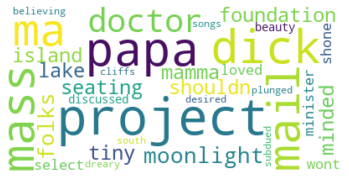

Topic#  2
dick,fish,sunk,distinguished,guns,drifted,suited,consisting,charming,tail,subsided,peril,attempted,powder,invalid,blame,plate,prize,unusual,granted,respected,stunned,solid,reported,amazement,facing,reputation,stock,clapping,scratched,string,larger,profit,meat,supposing,pour,tower,bleeding,climbing,tie,awe,bade,stolen,absurd,disaster,rattle,keen,honestly,plunged,tumbled



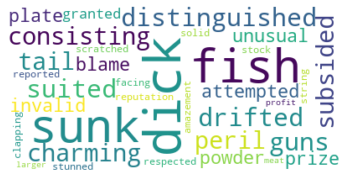

Topic#  3
project,doctor,king,dick,tom,uncle,camp,ship,jack,girls,prince,troops,french,em,army,shore,ye,deck,john,yer,indian,papa,mamma,ain,soldiers,village,island,officers,city,attack,london,sister,officer,works,street,vessel,rode,boats,guns,aunt,cousin,queen,hut,dr,forest,ha,george,foundation,presently,fish



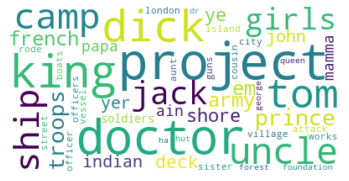

Topic#  4
project,girls,stir,baby,guilty,tells,divided,feathers,hail,hidden,mamma,clap,gray,proceed,approve,beauty,larger,trousers,surrounded,ha,aunt,monstrous,freely,beds,church,united,papers,offering,thundered,tie,plot,lap,uncle,incident,furiously,declared,caps,song,tough,interrupted,dread,instance,assistance,reflection,inquiry,valuable,pardon,blessing,lion,changing



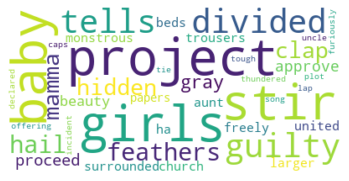

In [25]:
import wordcloud
from matplotlib import pyplot as plt

terms_count = 50 # declare number of terms we need per topic

for idx,topic in enumerate(lda.components_): # loop over topics
    print('Topic# ',idx+1)
    #topic_terms = [[vocab[i],topic[i]] for i in topic.argsort()][:-terms_count-1:-1]
    topic_terms_sorted = [[vocab[i], topic[i]] for i in topic.argsort()[:-terms_count - 1:-1]]
    
    topic_words = []

    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print()

    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    wcloud = wordcloud.WordCloud(background_color="white",mask=None, max_words=100, 
                       max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                       contour_width=3,contour_color='black')

    wcloud.generate_from_frequencies(dict_word_frequency)

    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    #plt.savefig("WordCloud Topic "+str(idx+1)+".png", format="png")

## Words aligned with each topic <a id='words'></a>

In [26]:
# Get topic distribution and merge with main DataFrame
topic_dist = lda.transform(dtm)
topic_dist_df = pd.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(df_lit)

In [27]:
# create word count column
df_w_topics['word_count'] = df_w_topics['text'].apply(lambda x: len(str(x).split()))
df_w_topics['word_count']

0       96493
1      100603
2       85132
3       92822
4       48251
        ...  
122     68589
123     76593
124     56018
125     53942
126    108275
Name: word_count, Length: 127, dtype: int64

In [28]:
# multiply topic weight by word count
df_w_topics['0_wc'] = df_w_topics[0] * df_w_topics['word_count']
df_w_topics['0_wc']

0       740.356225
1      1141.120772
2       755.634151
3      1031.869459
4       803.134055
          ...     
122     923.704902
123     713.691303
124     720.158508
125     802.933453
126    1801.141445
Name: 0_wc, Length: 127, dtype: float64

In [29]:
# create a for loop to do this for every topic
col_list = []
topic_columns = range(0,4)

for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    df_w_topics[col] = df_w_topics[num] * df_w_topics['word_count']
    
df_w_topics

,0,1,2,3,title,author gender,year,text,word_count,0_wc,1_wc,2_wc,3_wc
0,0.007673,0.007661,0.977002,0.007665,A Dog with a Bad Name,Male,1886.0,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...,96493,740.356225,739.190716,94273.826121,739.626937
1,0.011343,0.011326,0.965999,0.011332,A Final Reckoning,Male,1887.0,A Final Reckoning: A Tale of Bush Life in Aust...,100603,1141.120772,1139.456034,97182.430060,1139.993134
2,0.008876,0.008865,0.973378,0.008880,"A House Party, Don Gesualdo, and A Rainy June",Female,1887.0,A HOUSE-PARTY Don Gesualdo and A Rainy June...,85132,755.634151,754.711330,82865.647809,756.006710
3,0.011117,0.011101,0.966672,0.011111,A Houseful of Girls,Female,1889.0,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ...",92822,1031.869459,1030.402405,89728.398222,1031.329913
4,0.016645,0.016613,0.950098,0.016644,A Little Country Girl,Female,1885.0,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ...",48251,803.134055,801.599220,45843.190881,803.075845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.013467,0.013452,0.959620,0.013462,Treasure Island,Male,1883.0,TREASURE ISLAND by Robert Louis Stevenson ...,68589,923.704902,922.638755,65819.343515,923.312828
123,0.009318,0.009302,0.972069,0.009311,Twice Bought,Male,1885.0,"The Project Gutenberg EBook of Twice Bought, b...",76593,713.691303,712.460606,74453.704402,713.143689
124,0.012856,0.012844,0.961450,0.012851,Two Arrows,Male,1886.0,TWO ARROWS HARPER'S YOUNG PEOPLE'S SERIES...,56018,720.158508,719.469181,53858.499429,719.872881
125,0.014885,0.014874,0.955360,0.014880,Uncle Remus: His Songs and Sayings,Male,1880.0,Uncle Remus: His Songs and His Sayings By Joe...,53942,802.933453,802.344770,51534.040242,802.681535


### Challenge

- What is the total number of words aligned with each topic, by author gender?
- What is the proportion of total words aligned with each topic, by author gender?

In [30]:
#solution
grouped = df_w_topics.groupby('author gender')
for e in col_list:
    print(e)
    print(grouped[e].sum())

0_wc
author gender
Female     23026.853890
Male      119517.326881
Name: 0_wc, dtype: float64
1_wc
author gender
Female     22994.890006
Male      119393.769862
Name: 1_wc, dtype: float64
2_wc
author gender
Female    1.436343e+06
Male      7.539290e+06
Name: 2_wc, dtype: float64
3_wc
author gender
Female     23011.819198
Male      119453.723315
Name: 3_wc, dtype: float64


In [31]:
for e in col_list:
    print(e)
    print(grouped[e].sum()/grouped['word_count'].sum())

0_wc
author gender
Female    0.015296
Male      0.015133
dtype: float64
1_wc
author gender
Female    0.015275
Male      0.015118
dtype: float64
2_wc
author gender
Female    0.954142
Male      0.954624
dtype: float64
3_wc
author gender
Female    0.015286
Male      0.015125
dtype: float64


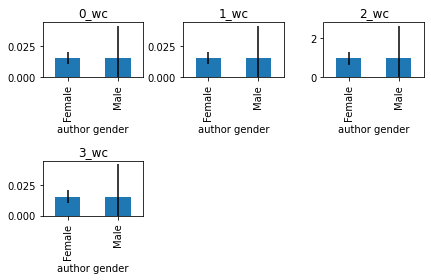

In [32]:
fig2 = plt.figure()
chrt = 0
for e in col_list:
    chrt += 1 
    ax2 = fig2.add_subplot(2,3, chrt)
    (grouped[e].sum()/grouped['word_count'].sum()).plot(
        kind = 'bar', 
        yerr = grouped[e].sum()/grouped['word_count'].sum().std(), 
        ylim=0, ax=ax2, title=e)

fig2.tight_layout()
plt.show()

## Topic Prevalence <a id='prevalence'></a>

### Challenge

- Find the most prevalent topic in the corpus.
- Find the least prevalent topic in the corpus.        

In [33]:
#solution
for e in col_list:
    print(e)
    print(df_w_topics[e].sum()/df_w_topics['word_count'].sum())

0_wc
0.015159385131010124
1_wc
0.01514284568315398
2_wc
0.9545467471315011
3_wc
0.01515102205433472


## Prevalence over time <a id='overtime'></a>

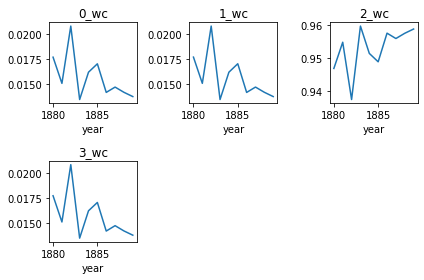

In [34]:
grouped_year = df_w_topics.groupby('year')
fig3 = plt.figure()
chrt = 0
for e in col_list:
    chrt += 1 
    ax2 = fig3.add_subplot(2,3, chrt)
    (grouped_year[e].sum()/grouped_year['word_count'].sum()).plot(
        kind='line', title=e)
    
fig3.tight_layout()
plt.show()

## Visualising topics with pyLDAvis <a id='viz'></a>

In [35]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

# Silence an annoying warning we cannot do anything about
import warnings
warnings.filterwarnings('ignore')

In [36]:
pyLDAvis.sklearn.prepare(lda, dtm, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.007925  0.000002       1        1  95.965119
0     -0.002223  0.000428       2        1   1.345791
3     -0.002602 -0.000802       3        1   1.344961
1     -0.003100  0.000372       4        1   1.344129, topic_info=           Term      Freq     Total Category  logprob  loglift
2148    project  4.000000  4.000000  Default  30.0000  30.0000
815        dick  3.000000  3.000000  Default  29.0000  29.0000
1255      girls  2.000000  2.000000  Default  28.0000  28.0000
2989      uncle  2.000000  2.000000  Default  27.0000  27.0000
1724      mamma  2.000000  2.000000  Default  26.0000  26.0000
...         ...       ...       ...      ...      ...      ...
1326       guns  0.012317  1.679246   Topic4  -7.8321  -0.6057
2849       tail  0.012000  1.151809   Topic4  -7.8582  -0.2547
2721      stock  0.011582  0.706522   Topic4  -7.8937   0.1985
93    amazement  0.011610  0.774062   Topic4  -7.8913   0.1096
2316   reported  0.011612  0.779600   Topic4  -7.8911   0.1027

[271 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3         1  1.732914         30
14        1  1.660325   absorbed
80        1  0.997136        ain
89        1  1.803324      alter
93        1  1.291886  amazement
...     ...       ...        ...
3099      1  1.595160    washing
3163      1  1.478848       wont
3171      1  1.431676     wounds
3184      1  0.893890         ye
3190      1  0.948456        yer

[170 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

## Evaluating the topic model <a id='eval'></a>

#### TO DO: Add code here

Use tmtoolkit: https://tmtoolkit.readthedocs.io/en/latest/topic_modeling.html

Consider grid search too: https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/